In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.random.uniform(0.1,5,100)
noise = np.random.normal(scale=0.3, size=x.size)

In [4]:
#y = -x**3 + 7*x**2 - 14*x + 8
y = (4-x) * (2-x) * (1-x)

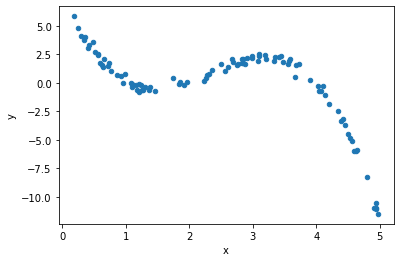

In [5]:
df = pd.DataFrame({'y':y+noise, 'x':x})
ax = df.plot.scatter(x = 'x', y = 'y')

In [6]:
df = pd.DataFrame()
rows = 100
df['w_in'] = np.random.uniform(5,50,rows)
df['h_in'] = np.random.uniform(5,50,rows)
df['border_in'] = 2*df['w_in'] + 2*df['h_in']
df['w_cm'] = df['w_in'] * 2.54
df['h_cm'] = df['h_in'] * 2.54
df += np.random.normal(size=(df.shape))
df

,w_in,h_in,border_in,w_cm,h_cm
0,5.699698,50.168432,112.193210,17.555865,126.204534
1,37.135975,6.108016,86.948897,90.260410,16.412426
2,35.566889,21.271576,109.868097,88.222931,51.631764
3,36.513894,10.749746,96.516408,95.681264,27.372396
4,37.703008,29.288046,131.792292,93.109268,72.478420
...,...,...,...,...,...
95,19.885546,9.389381,60.186899,54.861550,22.836157
96,12.530743,30.405679,86.146213,34.265226,74.238626
97,44.999264,22.265721,132.271920,114.968884,54.365201
98,29.292494,37.443423,135.559743,78.415152,93.675439


In [7]:
df.corr()

,w_in,h_in,border_in,w_cm,h_cm
w_in,1.000000,-0.017019,0.694603,0.996641,-0.021692
h_in,-0.017019,1.000000,0.702868,-0.005337,0.997023
border_in,0.694603,0.702868,1.000000,0.704786,0.701080
w_cm,0.996641,-0.005337,0.704786,1.000000,-0.010316
h_cm,-0.021692,0.997023,0.701080,-0.010316,1.000000


In [9]:
cov = df.cov()
cov

,w_in,h_in,border_in,w_cm,h_cm
w_in,168.762378,-2.867681,330.339123,430.559018,-9.364502
h_in,-2.867681,168.239498,333.751740,-2.302151,429.754548
border_in,330.339123,333.751740,1340.204316,858.022956,852.912638
w_cm,430.559018,-2.302151,858.022956,1105.891019,-11.400117
h_cm,-9.364502,429.754548,852.912638,-11.400117,1104.340076


In [11]:
u, s, vh = np.linalg.svd(cov)
#　cov = u*s@vh

In [12]:
u.shape

(5, 5)

In [13]:
s.shape

(5,)

In [15]:
vh.shape

(5, 5)

In [18]:
pd.DataFrame((u * s).dot(vh), columns = cov.columns, index = cov.index)

,w_in,h_in,border_in,w_cm,h_cm
w_in,168.762378,-2.867681,330.339123,430.559018,-9.364502
h_in,-2.867681,168.239498,333.751740,-2.302151,429.754548
border_in,330.339123,333.751740,1340.204316,858.022956,852.912638
w_cm,430.559018,-2.302151,858.022956,1105.891019,-11.400117
h_cm,-9.364502,429.754548,852.912638,-11.400117,1104.340076


In [19]:
pd.DataFrame((u * s) @ vh, columns = cov.columns, index = cov.index)

,w_in,h_in,border_in,w_cm,h_cm
w_in,168.762378,-2.867681,330.339123,430.559018,-9.364502
h_in,-2.867681,168.239498,333.751740,-2.302151,429.754548
border_in,330.339123,333.751740,1340.204316,858.022956,852.912638
w_cm,430.559018,-2.302151,858.022956,1105.891019,-11.400117
h_cm,-9.364502,429.754548,852.912638,-11.400117,1104.340076


In [20]:
u = np.array([[-0.21483724,  0.88723069,  0.40824829],
              [-0.52058739,  0.24964395, -0.81649658],
              [-0.82633754, -0.38794278,  0.40824829]])
s = np.array([16.84810335261421, 1.06836951455471, 0])
vt = np.array([[-0.47967118, -0.57236779, -0.66506441],
               [-0.77669099, -0.07568647,  0.62531805],
               [-0.40824829,  0.81649658, -0.40824829]])

In [21]:
A = (u * s) @ vt
np.round(A, 2)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [22]:
A = (u * s).dot(vt)
np.round(A, 2)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [36]:
u, s, vh = np.linalg.svd(cov)

In [37]:
vh

array([[-1.77311040e-01, -1.78845488e-01, -7.18146626e-01,
        -4.60438660e-01, -4.56986597e-01],
       [ 2.58793407e-01, -2.56011116e-01, -7.90264922e-04,
         6.56618796e-01, -6.60556896e-01],
       [ 8.15205533e-01,  1.31289621e-01, -4.65054309e-01,
         4.70071051e-02,  3.15781246e-01],
       [ 3.36732383e-01, -7.73941713e-01,  3.50614234e-01,
        -4.04782458e-01,  2.90920498e-02],
       [-3.51621967e-01, -5.35023233e-01, -3.80866048e-01,
         4.36794563e-01,  5.04245669e-01]])

In [38]:
v0 = vh[0].reshape(-1,1)
v1 = vh[1].reshape(-1,1)
v2 = vh[2].reshape(-1,1)
v2

array([[ 0.81520553],
       [ 0.13128962],
       [-0.46505431],
       [ 0.04700711],
       [ 0.31578125]])

In [39]:
np.dot(cov, v0)

array([[ -460.60905356],
       [ -464.59515878],
       [-1865.56255853],
       [-1196.10270785],
       [-1187.13512481]])

In [40]:
np.dot(cov, v0) / v0

array([[2597.74604491],
       [2597.74604491],
       [2597.74604491],
       [2597.74604491],
       [2597.74604491]])

In [41]:
np.dot(cov, v2) / v2

array([[1.0501571],
       [1.0501571],
       [1.0501571],
       [1.0501571],
       [1.0501571]])

In [42]:
# vh: eigenvectors(horizontal)
# s: eigenvalues

In [43]:
list(s)

[2597.7460449128794,
 1286.9208222724674,
 1.0501570955894473,
 0.9313165493845107,
 0.788945748390374]

In [44]:
s / s.sum()

array([6.68241274e-01, 3.31046066e-01, 2.70141231e-04, 2.39570823e-04,
       2.02947518e-04])

In [45]:
s.cumsum() / s.sum()

array([0.66824127, 0.99928734, 0.99955748, 0.99979705, 1.        ])

In [59]:
vh[:n_components]

array([[-0.17731104, -0.17884549, -0.71814663, -0.46043866, -0.4569866 ],
       [ 0.25879341, -0.25601112, -0.00079026,  0.6566188 , -0.6605569 ]])

In [51]:
n_components = 2
reconstruction = (u[:,:n_components] * s[:n_components]) @ vh[:n_components]
pd.DataFrame(reconstruction, index = cov.index, columns = cov.columns)

,w_in,h_in,border_in,w_cm,h_cm
w_in,167.861341,-2.885787,330.521643,430.766889,-9.504080
h_in,-2.885787,167.437716,333.907811,-2.416020,429.944823
border_in,330.521643,333.907811,1339.748262,858.309338,853.208877
w_cm,430.766889,-2.416020,858.309338,1105.585581,-11.578505
h_cm,-9.504080,429.944823,853.208877,-11.578505,1104.033969


In [52]:
A = np.array([[4, 1, 7],
              [1, 4, 3],
              [7, 3, 4]])

v1 = np.array([0.68777769, 0.4381872, 0.69928217]).reshape(-1,1)
v2 = np.array([-0.1017017, -0.77186858, 0.29665168]).reshape(-1,1)
v3 = np.array([0.6627402, 0.20526185, -0.72016873]).reshape(-1,1)
v4 = np.array([0.89036881, -0.78460023, 0.30786775]).reshape(-1,1)

A.dot(v1) / v1

array([[11.75419509],
       [10.35715557],
       [12.76471   ]])

In [53]:
A.dot(v2) / v2

array([[-8.82862705],
       [ 2.9787726 ],
       [-6.2056312 ]])

In [54]:
A.dot(v3) / v3

array([[-3.29685518],
       [-3.29685516],
       [-3.29685521]])

In [55]:
A.dot(v4) / v4

array([[ 5.53922061],
       [ 1.68803017],
       [16.59885448]])

In [56]:
u, s, vh = np.linalg.svd(cov)

In [57]:
means = df.mean()
df0 = df - means
df0.head(3)

,w_in,h_in,border_in,w_cm,h_cm
0,-22.152757,22.946208,2.284346,-53.159461,57.500061
1,9.283520,-21.114208,-22.959967,19.545084,-52.292047
2,7.714434,-5.950648,-0.040767,17.507604,-17.072709


In [62]:
arr = df0.values @ vh[:n_components].T
pc = pd.DataFrame(arr, columns = ['pc{}'.format(i+1) for i in range(arr.shape[1])])

pc.head(3)

,pc1,pc2
0,-3.616479,-84.496840
1,33.516186,55.201672
2,-0.533509,26.293227


In [65]:
df0_rec = pd.DataFrame(pc.values @ vh[:n_components], columns = df.columns)
df0_rec + means

,w_in,h_in,border_in,w_cm,h_cm
0,6.626472,49.501146,112.572801,16.898280,126.172126
1,36.195494,7.095764,85.795704,91.529634,16.924180
2,34.751566,20.586282,110.271223,88.225602,51.580107
3,37.568473,11.085045,96.640293,95.172596,27.149825
4,36.826861,28.924788,131.346706,93.800856,72.963948
...,...,...,...,...,...
95,21.499314,9.215945,60.647462,53.871866,22.551284
96,13.546308,29.519074,85.900625,34.063929,74.780322
97,44.976390,21.631511,132.881195,114.501008,54.136224
98,30.593800,37.072468,135.385989,78.045204,93.961502


In [66]:
df

,w_in,h_in,border_in,w_cm,h_cm
0,5.699698,50.168432,112.193210,17.555865,126.204534
1,37.135975,6.108016,86.948897,90.260410,16.412426
2,35.566889,21.271576,109.868097,88.222931,51.631764
3,36.513894,10.749746,96.516408,95.681264,27.372396
4,37.703008,29.288046,131.792292,93.109268,72.478420
...,...,...,...,...,...
95,19.885546,9.389381,60.186899,54.861550,22.836157
96,12.530743,30.405679,86.146213,34.265226,74.238626
97,44.999264,22.265721,132.271920,114.968884,54.365201
98,29.292494,37.443423,135.559743,78.415152,93.675439


In [67]:
rows = [['M. Dupé', 1, 25, 'Right', 8.0, 900.0],
       ['N. Fernández', 26, 18, 'Right', 1.0, 450.0],
       ['P. Kalambayi', 30, 18, 'Right', 1.0, 130.0],
       ['P. McNair', 17, 23, 'Right', 22.0, 2300.0],
       ['G. Bojanich', 23, 33, 'Right', 6.0, 425.0],
       ['A. Kofler', 31, 31, 'Right', 3.0, 325.0],
       ['N. Lavanchy', 14, 24, 'Right', 3.0, 600.0],
       ['O. Al Khalaf', 8, 21, 'Right', 3.0, 240.0],
       ['J. Sills', 21, 31, 'Right', 7.0, 600.0],
       ['B. Fox', 12, 20, 'Right', 1.0, 230.0],
       ['S. Smith', 9, 20, 'Left', 4.0, 450.0],
       ['E. Ocansey', 28, 20, 'Left', 5.0, 1600.0],
       ['F. Kostić', 10, 25, 'Left', 16.0, 10500.0],
       ['M. Ullmann', 13, 22, 'Left', 3.0, 1000.0],
       ['R. Taylor', 9, 30, 'Left', 4.0, 625.0],
       ['N. Vikonis', 34, 34, 'Left', 7.0, 2700.0],
       ['J. Aguirre', 29, 21, 'Left', 1.0, 575.0],
       ['J. Konings', 25, 20, 'Left', 1.0, 500.0],
       ['J. Raitala', 22, 29, 'Left', 3.0, 700.0],
       ['A. Taylor', 3, 31, 'Left', 3.0, 425.0]]
df = pd.DataFrame.from_records(rows, columns=["Name", "JerseyNumber", "Age", "PreferredFoot", "Wage", "Value"])
df["PreferredFootInt"] = (df["PreferredFoot"] == "Right").astype(int)
df = df[["JerseyNumber", "Age", "Wage", "Value", "PreferredFootInt"]]
df

,JerseyNumber,Age,Wage,Value,PreferredFootInt
0,1,25,8.0,900.0,1
1,26,18,1.0,450.0,1
2,30,18,1.0,130.0,1
3,17,23,22.0,2300.0,1
4,23,33,6.0,425.0,1
5,31,31,3.0,325.0,1
6,14,24,3.0,600.0,1
7,8,21,3.0,240.0,1
8,21,31,7.0,600.0,1
9,12,20,1.0,230.0,1


In [68]:
_,s,_ = np.linalg.svd(df)
s = np.array(sorted(np.abs(s), reverse=True))
s.cumsum() / s.sum()

array([0.98439685, 0.99521466, 0.99836246, 0.999822  , 1.        ])

In [69]:
df = pd.DataFrame()
rows = 100
df['w_in'] = np.random.uniform(5,50,rows)
df['h_in'] = np.random.uniform(5,50,rows)
df['border_in'] = 2*df['w_in'] + 2*df['h_in']
df['w_cm'] = df['w_in'] * 2.54
df['h_cm'] = df['h_in'] * 2.54
df += np.random.normal(size=(df.shape))
df

,w_in,h_in,border_in,w_cm,h_cm
0,12.689895,35.184066,96.288428,35.525104,88.808857
1,40.690478,44.839692,166.967609,100.037596,115.140492
2,38.336035,41.329488,162.571841,100.521297,107.899947
3,41.252197,13.725729,108.846175,103.516409,33.472775
4,45.534074,19.767761,130.684482,113.888482,51.110918
...,...,...,...,...,...
95,8.474548,23.709255,66.906528,22.391029,61.108374
96,38.754834,38.305757,155.117190,96.763514,97.817807
97,19.418274,33.173833,103.428502,45.401166,87.484262
98,28.175566,31.215133,118.769094,71.876223,81.331048


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [75]:
poly = PolynomialFeatures(2)
A = poly.fit_transform(df)
pd.DataFrame(A, columns = poly.get_feature_names(df.columns))

,1,w_in,h_in,border_in,w_cm,h_cm,w_in^2,w_in h_in,w_in border_in,w_in w_cm,...,h_in^2,h_in border_in,h_in w_cm,h_in h_cm,border_in^2,border_in w_cm,border_in h_cm,w_cm^2,w_cm h_cm,h_cm^2
0,1.0,12.689895,35.184066,96.288428,35.525104,88.808857,161.033443,446.482118,1221.890065,450.809856,...,1237.918523,3387.818421,1249.917631,3124.656727,9271.461282,3420.656447,8551.265226,1262.033047,3154.943934,7887.013141
1,1.0,40.690478,44.839692,166.967609,100.037596,115.140492,1655.715021,1824.548527,6793.991850,4070.577627,...,2010.598010,7486.776204,4485.655030,5162.864243,27878.182339,16703.038185,19224.732626,10007.520620,11518.378037,13257.332923
2,1.0,38.336035,41.329488,162.571841,100.521297,107.899947,1469.651578,1584.408701,6232.359789,3853.587946,...,1708.126585,6719.010971,4154.493733,4459.449586,26429.603538,16341.932279,17541.493095,10104.531089,10846.242617,11642.398629
3,1.0,41.252197,13.725729,108.846175,103.516409,33.472775,1701.743784,566.216498,4490.143907,4270.279317,...,188.395648,1493.993152,1420.838216,459.438253,11847.489904,11267.365178,3643.383544,10715.646865,3464.981460,1120.426669
4,1.0,45.534074,19.767761,130.684482,113.888482,51.110918,2073.351869,900.106680,5950.596850,5185.806545,...,390.764369,2583.339594,2251.320282,1010.348399,17078.433911,14883.457339,6679.403823,12970.586384,5820.944846,2612.325912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,8.474548,23.709255,66.906528,22.391029,61.108374,71.817968,200.925223,567.002596,189.753858,...,562.128762,1586.303912,530.874620,1448.834000,4476.483450,1498.106028,4088.549095,501.358197,1368.279390,3734.233331
96,1.0,38.754834,38.305757,155.117190,96.763514,97.817807,1501.937162,1484.533239,6011.540953,3750.053931,...,1467.330987,5941.881317,3706.599616,3746.985095,24061.342599,15009.684389,15173.223307,9363.177658,9465.194723,9568.323321
97,1.0,19.418274,33.173833,103.428502,45.401166,87.484262,377.069364,644.178583,2008.402986,881.612282,...,1100.503214,3431.119878,1506.130715,2902.188336,10697.455010,4695.774596,9048.366205,2061.265884,3971.887531,7653.496174
98,1.0,28.175566,31.215133,118.769094,71.876223,81.331048,793.862500,879.504029,3346.386399,2025.153251,...,974.384527,3707.393056,2243.625871,2538.759492,14106.097634,8536.673914,9659.614914,5166.191487,5845.768603,6614.739435


In [87]:
pca = PCA(0.99)
A = pca.fit_transform(df)
pc_df = pd.DataFrame(A, columns = ['pc'+ str(i+1) for i in range(pca.n_components_)])
pc_df

,pc1,pc2
0,-25.966239,35.069014
1,76.397870,19.450108
2,69.915022,13.080631
3,3.205638,-55.833692
4,32.539530,-46.374733
...,...,...
95,-66.548544,17.722183
96,58.592171,6.360428
97,-14.802889,26.941193
98,9.931786,5.960866


In [89]:
orig = pca.inverse_transform(pc_df)
pd.DataFrame(orig, columns = df.columns)

,w_in,h_in,border_in,w_cm,h_cm
0,13.894143,34.688818,96.749844,34.683224,88.631343
1,39.725570,44.552940,168.109973,99.514312,114.369630
2,39.752885,41.882619,162.878514,99.718693,107.437368
3,40.796017,13.467404,108.719811,103.796635,33.674108
4,45.048744,20.167809,130.517609,114.212815,51.090400
...,...,...,...,...,...
95,8.973699,24.234635,66.181102,22.768499,61.466537
96,38.805026,38.443109,154.167580,97.495712,98.503310
97,18.163307,33.978620,103.910315,45.516452,86.809109
98,28.294144,31.578996,119.488231,71.260179,80.630493


In [90]:
df

,w_in,h_in,border_in,w_cm,h_cm
0,12.689895,35.184066,96.288428,35.525104,88.808857
1,40.690478,44.839692,166.967609,100.037596,115.140492
2,38.336035,41.329488,162.571841,100.521297,107.899947
3,41.252197,13.725729,108.846175,103.516409,33.472775
4,45.534074,19.767761,130.684482,113.888482,51.110918
...,...,...,...,...,...
95,8.474548,23.709255,66.906528,22.391029,61.108374
96,38.754834,38.305757,155.117190,96.763514,97.817807
97,19.418274,33.173833,103.428502,45.401166,87.484262
98,28.175566,31.215133,118.769094,71.876223,81.331048


In [91]:
x = np.random.uniform(0,100,size=50) # hidden
y = 20 - x # want to predict this
x1 = 2*x
x2 = 10-3*x
x3 = 20+x
df = pd.DataFrame({"x1":x1, "x2":x2, "x3":x3, "y":y})
noise = np.random.normal(scale=10, size=df.shape)
df += noise
df.head()

,x1,x2,x3,y
0,89.247391,-142.864143,71.504109,-22.530965
1,94.076560,-132.538330,89.300263,-41.700362
2,208.198129,-293.765832,105.903888,-77.445138
3,70.404275,-98.109776,61.913974,-13.228772
4,39.821509,-42.316575,56.564056,-8.328541


In [92]:
pca = PCA(1)
df["pc1"] = pca.fit_transform(df[['x1','x2','x3']])
df.head()

,x1,x2,x3,y,pc1
0,89.247391,-142.864143,71.504109,-22.530965,11.625527
1,94.076560,-132.538330,89.300263,-41.700362,12.905372
2,208.198129,-293.765832,105.903888,-77.445138,-182.241740
3,70.404275,-98.109776,61.913974,-13.228772,60.260433
4,39.821509,-42.316575,56.564056,-8.328541,122.971307


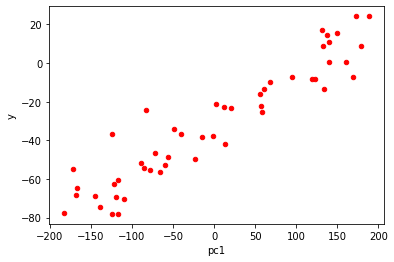

In [93]:
df.plot.scatter(x="pc1", y="y", color="red")

In [94]:
pca.explained_variance_ratio_

array([0.98452389])

In [1]:
import torch
torch.__version__

'1.4.0'